In [39]:
n=5
p1 = 0.5
p_infect = 0.5
pas = 4

In [40]:
import numpy as np
import random as rd
import numpy

In [41]:
def grille(n):

    a=np.zeros((n,n),dtype=int)
    k=1
    r=1
    for i in range(n):
        if i==k:
            for j in range(n):
                if j==r:
                    a[i,j]=1  #personne infectee
    return a
# une grille avec une personne infectée "1" et le reste c'est des personnes saines "0"

In [42]:
def etat_incubation1(M, p1, p_infect, x, y, pas, dictio):
    # p1 i.e taux de mortalité
    #diction i.e un dictionnaire qui enregistre le nombre de jours depuis que l'individu est infecté 
    # cette fonction permet de determiner l'etat de l'individu aux indices x et y
    assert M.shape[0] == M.shape[1]   #M une matrice de taille n*n qui represente la population à etudier 
    
    n = M.shape[0]
    
    resultat = M
    
    L = [(1,0),(-1,0),(0,1),(0,-1),(1,-1),(1,1),(-1,1),(-1,-1)]
    voisin_infecte = 0

    if M[x, y] == 2:  # i.e. personne rétablie
        resultat[x, y] = 2  # reste rétablie
    elif M[x, y] == 3:  # i.e personne décédée
        resultat[x, y] = 3  # reste décédée
    elif M[x, y] == 0:  # i.e. personne saine        
        for (dx, dy) in L:  # pour chaque voisin
            if x+dx < n and x+dx >= 0 and y+dy < n and y+dy >= 0:  # i.e. gestion des bords
                if M[x+dx, y+dy] == 1:  # i.e. voisin infecté
                    # if numpy.random.random() <= p2:
                        voisin_infecte += 1

    # Gérer l'infection de la personne.
    if voisin_infecte > 0:
        
        if numpy.random.random() <= p_infect:
            
            resultat[x,y]=1  
   
    # Gérer l'incubation de la personne.
    if resultat[x, y] == 1 :  # i.e. infectée
        # Incrémente le compteur de tous les malades : dictio = dict()
        if (x, y) in dictio:
            #print((x, y))
            dictio[(x, y)] = dictio[(x, y)] + 1   # On entre en incubation 
        else:
            # Nouvel infecté : on le rajoute au dictionnaire
            dictio[(x, y)] = 1
        #print((x,y), dictio[(x,y)])
    
   
    # En incubation depuis "pas" tours : on devient soit rétabli soit décédé selon une propabilité  p1

    if (x, y) in dictio and dictio[(x, y)] >= pas:
        if numpy.random.random() <= p1:
            resultat[x, y] = 3  # décédé
        else:
            resultat[x, y] = 2  # rétabli
        dictio.pop((x, y))   # on l'enleve du dictio car il n'est plus infecte
    
    return resultat, dictio

In [43]:
def next_step_incubation(M,d):  #permet de determiner l'etat de chaque individu en fonction de son voisinage
    for i in range(n):
        for j in range(n):
            M, d = etat_incubation1(M, p1, p_infect, i, j, pas, d)    
    return M

In [44]:
def next_step_incubation_nb(M,d,nb_infect,nb_sain,nb_retabli,nb_mort,Dict):
     # cette fonction permet de calculer le nombre d'infectes,sains,retablis et morts
     #Dict est un dictionaire qui enregistre les personnes deja comptées
    for i in range(n):
        for j in range(n):
            M, d = etat_incubation1(M, p1, p_infect, i, j, pas, d)  #determiner l'etat de l'individu (i,j) en fonction de son voisinage
            if M[i,j]==1:
                if not (i,j) in  Dict:   #la personne n'est pas comptée 
                    nb_infect+=1         #on incremente le nombre de personnes infectées
                    Dict[(i,j)]=1   #on ajoute les indices de la personne au dictionnaire
                else:                   # la personne est dans le dictionaire
                    if M[i,j]!= Dict[(i,j)]: #l'individu a un nouveau etat
                        nb_infect+=1
                        Dict[(i,j)]=1
                            
            elif M[i,j]==0:
                nb_sain+=1
                if not (i,j) in  Dict:        
                    Dict[(i,j)]=0         #on ajoute les indices de la personne aux dictionnaire
                
                   
                            
            elif M[i,j]==2:
                if not (i,j) in  Dict:   #la personne n'est pas comptée 
                    nb_retabli+=1         #on incremente le nombre de personnes rétablies
                    Dict[(i,j)]=2   #on ajoute les indices de la personne aux dictionnaire
                else:                   # la personne est dans le dictionaire
                    if Dict[(i,j)]!=M[i,j]:    #la valeur qui correspond aux indices i et j est differente que celle de la matrice changement d'etat de la personne
                        nb_retabli+=1
                        Dict[(i,j)]=2
                        
            elif M[(i,j)]==3:
                if not (i,j) in  Dict:   #la personne n'est pas comptée 
                    nb_mort+=1         #on incremente le nombre de personnes décédées
                    Dict[(i,j)]=M[i,j]   #on ajoute les indices de la personne aux dictionnaire
                else:                   # la personne est dans le dictionaire
                    if Dict[(i,j)]!=M[i,j]:    #la valeur qui correspond aux indices i et j est differente que celle de la matrice changement d'etat de la personne
                        nb_mort+=1
                        Dict[(i,j)]=3
    
    return M,d,nb_infect,nb_sain,nb_retabli,nb_mort,Dict

In [45]:
def simulation_nb(max_itere=10,nb_infect=1,nb_sain=0,nb_retabli=0,nb_mort=0):
    #permet de calculer le nombre de personnes infectees,saines,retablies et mortes apres un certains nombre de tours 
    M=grille(n)
    print(M)
    DD={}
    dd={(1,1):1}
    list_infect_etape=[]   # une liste qui enregistre le nombre de personnes infectes a chaque etape
    list_sain_etape=[]     # une liste qui enregistre le nombre de personnes saines a chaque etape
    list_retabli_etape=[]  # une liste qui enregistre le nombre de personnes retables a chaque etape
    list_mort_etape=[]     # une liste qui enregistre le nombre de personnes décédées a chaque etape
    cpt=0
    resultat=[]    
    resultat.append((M).copy())
    while(cpt<max_itere):
        new_state,dd,nb_infect,nb_sain,nb_retabli,nb_mort,DD=next_step_incubation_nb(M,dd,nb_infect,nb_sain,nb_retabli,nb_mort,DD)
        resultat.append((new_state).copy())
        
        list_infect_etape.append(nb_infect)
        list_sain_etape.append(nb_sain)
        list_retabli_etape.append(nb_retabli)
        list_mort_etape.append(nb_mort)
        nb_sain=0
        
        cpt = cpt+1
        
    return resultat,nb_infect,nb_sain,nb_retabli,nb_mort,list_infect_etape,list_sain_etape,list_retabli_etape,list_mort_etape

In [46]:
from pylab import *

In [47]:
import matplotlib
import matplotlib.pyplot as plt

In [48]:
import numpy as np

In [16]:
n=5
p1 = 0.5
p_infect = 0.5
pas = 4

[[0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
nombre de personnes infectees a chaque etapes
[9, 19, 24, 25, 25, 25, 25, 25, 25, 25]
nombre de personnes saines a chaque etapes
[17, 7, 2, 1, 1, 1, 1, 1, 1, 1]
nombre de personnes retablies a chaque etapes
[0, 0, 0, 3, 5, 8, 9, 9, 9, 9]
nombre de personnes decedees a chaque etapes
[0, 0, 1, 5, 13, 15, 15, 15, 15, 15]


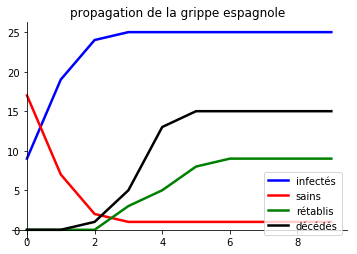

In [17]:
%matplotlib inline

_,_,_,_,_,results,results1,results2,results3 = simulation_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
y1= [results1[i] for i in range(n)]
y2= [results2[i] for i in range(n)]
y3= [results3[i] for i in range(n)]
print("nombre de personnes infectees a chaque etapes")
print(y)
print("nombre de personnes saines a chaque etapes")
print(y1)
print("nombre de personnes retablies a chaque etapes")
print(y2)
print("nombre de personnes decedees a chaque etapes")
print(y3)


figure()
plot(x, y, color="blue", linewidth=2.5, linestyle="-",  label="infectés")
plot(x,y1 , color="red",  linewidth=2.5, linestyle="-", label="sains")
plot(x,y2 , color="green",  linewidth=2.5, linestyle="-", label="rétablis")
plot(x,y3 , color="black",  linewidth=2.5, linestyle="-", label="décédés")


ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')

title('propagation de la grippe espagnole ')
plt.savefig('4courbe_sans_dep.png', dpi=200)
show()

# Variation de p_infect


# p_infect=0.2

In [18]:
#variation de p_infect:
n=5
p1 = 0.5
p_infect = 0.2
pas = 2

[[0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
nombre de personnes infectees a chaque etapes
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
nombre de personnes saines a chaque etapes
[23, 23, 23, 23, 23, 23, 23, 23, 23, 23]
nombre de personnes retablies a chaque etapes
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre de personnes decedees a chaque etapes
[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]


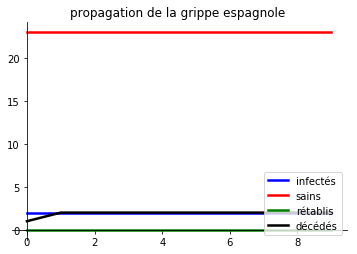

In [19]:
%matplotlib inline

_,_,_,_,_,results,results1,results2,results3 = simulation_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
y1= [results1[i] for i in range(n)]
y2= [results2[i] for i in range(n)]
y3= [results3[i] for i in range(n)]
print("nombre de personnes infectees a chaque etapes")
print(y)
print("nombre de personnes saines a chaque etapes")
print(y1)
print("nombre de personnes retablies a chaque etapes")
print(y2)
print("nombre de personnes decedees a chaque etapes")
print(y3)


figure()
plot(x, y, color="blue", linewidth=2.5, linestyle="-",  label="infectés")
plot(x,y1 , color="red",  linewidth=2.5, linestyle="-", label="sains")
plot(x,y2 , color="green",  linewidth=2.5, linestyle="-", label="rétablis")
plot(x,y3 , color="black",  linewidth=2.5, linestyle="-", label="décédés")


ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')

title('propagation de la grippe espagnole ')
plt.savefig('4courbe_sans_dep.png', dpi=200)
show()

# p_infect=0.7

In [21]:
#variation de p_infect
n=5
p1 = 0.5
p_infect = 0.7
pas = 2

[[0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
nombre de personnes infectees a chaque etapes
[13, 17, 20, 24, 24, 24, 24, 24, 24, 24]
nombre de personnes saines a chaque etapes
[12, 8, 5, 1, 1, 1, 1, 1, 1, 1]
nombre de personnes retablies a chaque etapes
[1, 8, 9, 9, 10, 10, 10, 10, 10, 10]
nombre de personnes decedees a chaque etapes
[0, 5, 8, 11, 14, 14, 14, 14, 14, 14]


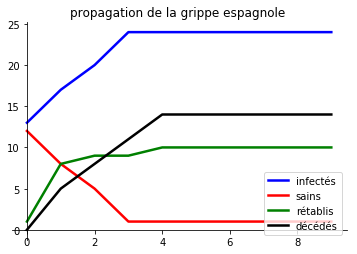

In [22]:
%matplotlib inline
_,_,_,_,_,results,results1,results2,results3 = simulation_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
y1= [results1[i] for i in range(n)]
y2= [results2[i] for i in range(n)]
y3= [results3[i] for i in range(n)]
print("nombre de personnes infectees a chaque etapes")
print(y)
print("nombre de personnes saines a chaque etapes")
print(y1)
print("nombre de personnes retablies a chaque etapes")
print(y2)
print("nombre de personnes decedees a chaque etapes")
print(y3)


figure()
plot(x, y, color="blue", linewidth=2.5, linestyle="-",  label="infectés")
plot(x,y1 , color="red",  linewidth=2.5, linestyle="-", label="sains")
plot(x,y2 , color="green",  linewidth=2.5, linestyle="-", label="rétablis")
plot(x,y3 , color="black",  linewidth=2.5, linestyle="-", label="décédés")


ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')

title('propagation de la grippe espagnole ')
plt.savefig('4courbe_sans_dep.png', dpi=200)
show()

# Variation de p1 la taux de mortalité

In [23]:
#variation de p1
n=5
p1 = 0.1
p_infect = 0.5
pas = 2

[[0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
nombre de personnes infectees a chaque etapes
[3, 13, 19, 23, 24, 24, 24, 24, 24, 24]
nombre de personnes saines a chaque etapes
[22, 12, 6, 2, 1, 1, 1, 1, 1, 1]
nombre de personnes retablies a chaque etapes
[1, 3, 13, 18, 22, 23, 23, 23, 23, 23]
nombre de personnes decedees a chaque etapes
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1]


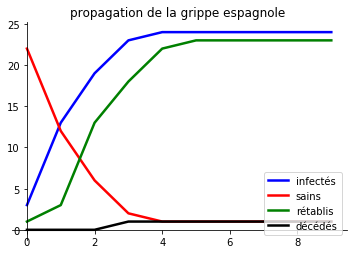

In [24]:
%matplotlib inline

_,_,_,_,_,results,results1,results2,results3 = simulation_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
y1= [results1[i] for i in range(n)]
y2= [results2[i] for i in range(n)]
y3= [results3[i] for i in range(n)]
print("nombre de personnes infectees a chaque etapes")
print(y)
print("nombre de personnes saines a chaque etapes")
print(y1)
print("nombre de personnes retablies a chaque etapes")
print(y2)
print("nombre de personnes decedees a chaque etapes")
print(y3)


figure()
plot(x, y, color="blue", linewidth=2.5, linestyle="-",  label="infectés")
plot(x,y1 , color="red",  linewidth=2.5, linestyle="-", label="sains")
plot(x,y2 , color="green",  linewidth=2.5, linestyle="-", label="rétablis")
plot(x,y3 , color="black",  linewidth=2.5, linestyle="-", label="décédés")


ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')

title('propagation de la grippe espagnole ')
plt.savefig('4courbe_sans_dep.png', dpi=200)
show()

In [25]:
#variation de p1
n=5
p1 = 1
p_infect = 0.5
pas = 2

[[0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
nombre de personnes infectees a chaque etapes
[16, 20, 21, 21, 21, 21, 21, 21, 21, 21]
nombre de personnes saines a chaque etapes
[9, 5, 4, 4, 4, 4, 4, 4, 4, 4]
nombre de personnes retablies a chaque etapes
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre de personnes decedees a chaque etapes
[1, 16, 20, 21, 21, 21, 21, 21, 21, 21]


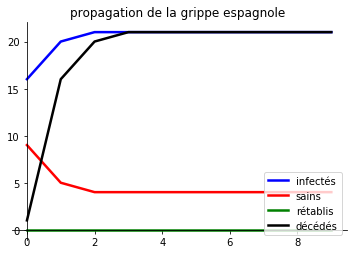

In [26]:
%matplotlib inline

_,_,_,_,_,results,results1,results2,results3 = simulation_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
y1= [results1[i] for i in range(n)]
y2= [results2[i] for i in range(n)]
y3= [results3[i] for i in range(n)]
print("nombre de personnes infectees a chaque etapes")
print(y)
print("nombre de personnes saines a chaque etapes")
print(y1)
print("nombre de personnes retablies a chaque etapes")
print(y2)
print("nombre de personnes decedees a chaque etapes")
print(y3)


figure()
plot(x, y, color="blue", linewidth=2.5, linestyle="-",  label="infectés")
plot(x,y1 , color="red",  linewidth=2.5, linestyle="-", label="sains")
plot(x,y2 , color="green",  linewidth=2.5, linestyle="-", label="rétablis")
plot(x,y3 , color="black",  linewidth=2.5, linestyle="-", label="décédés")


ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')

title('propagation de la grippe espagnole ')
plt.savefig('4courbe_sans_dep.png', dpi=200)
show()

# variation du temps d'incubation

In [27]:
#variation de temps d'incubation
n=5
p1 = 1
p_infect = 0.5
pas = 30

[[0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
nombre de personnes infectees a chaque etapes
[14, 20, 25, 25, 26, 26, 26, 26, 26, 26]
nombre de personnes saines a chaque etapes
[12, 6, 1, 1, 0, 0, 0, 0, 0, 0]
nombre de personnes retablies a chaque etapes
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nombre de personnes decedees a chaque etapes
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


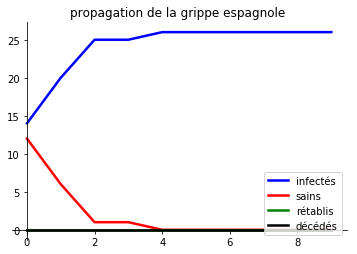

In [28]:
%matplotlib inline

_,_,_,_,_,results,results1,results2,results3 = simulation_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
y1= [results1[i] for i in range(n)]
y2= [results2[i] for i in range(n)]
y3= [results3[i] for i in range(n)]
print("nombre de personnes infectees a chaque etapes")
print(y)
print("nombre de personnes saines a chaque etapes")
print(y1)
print("nombre de personnes retablies a chaque etapes")
print(y2)
print("nombre de personnes decedees a chaque etapes")
print(y3)


figure()
plot(x, y, color="blue", linewidth=2.5, linestyle="-",  label="infectés")
plot(x,y1 , color="red",  linewidth=2.5, linestyle="-", label="sains")
plot(x,y2 , color="green",  linewidth=2.5, linestyle="-", label="rétablis")
plot(x,y3 , color="black",  linewidth=2.5, linestyle="-", label="décédés")


ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')

title('propagation de la grippe espagnole ')
plt.savefig('4courbe_sans_dep.png', dpi=200)
show()

# graphe personnes infectees

In [65]:
n=5
p1 = 0.5
p_infect = 0.5
pas = 2

[[0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
#####
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[7, 13, 13, 13, 13, 13, 13, 13, 13, 13]


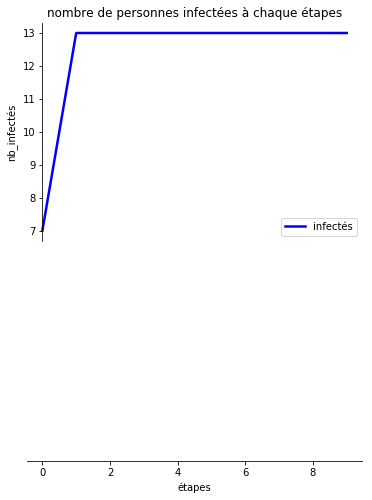

In [66]:
%matplotlib inline

_,_,_,_,_,results,_ ,_,_= simulation_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
    
print("#####")
print(x)
print(y)

figure()
plot(x, y, color="blue", linewidth=2.5, linestyle="-",  label="infectés")
xlabel('étapes')
ylabel('nb_infectés')
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')
title('nombre de personnes infectées à chaque étapes')
plt.savefig('graphique_courbe_infecte.png', dpi=200)

show()

In [29]:
n=5
p1 = 0.5
p_infect = 0.5
pas = 2

In [ ]:
%matplotlib inline

_,_,_,_,_,results,_ ,_,_= simulation_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
    
print("#####")
print(x)
print(y)

figure()
plot(x, y, color="blue", linewidth=2.5, linestyle="-",  label="infectés")
xlabel('étapes')
ylabel('nb_infectés')
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')
title('nombre de personnes infectées à chaque étapes')
plt.savefig('graphique_courbe_infecte.png', dpi=200)

show()

[[0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
#####
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[87, 0, 0, 0, 0, 0, 0, 0, 0, 0]


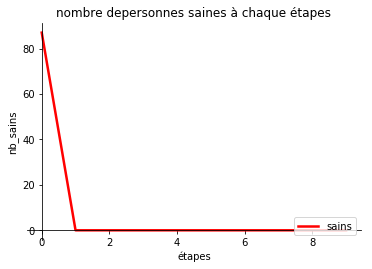

In [106]:
%matplotlib inline

_,_,_,_,_,_,results,_,_= simulation_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
    
print("#####")
print(x)
print(y)

figure()
plot(x,y , color="red",  linewidth=2.5, linestyle="-", label="sains")
xlabel('étapes')
ylabel('nb_sains')
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')
title('nombre depersonnes saines à chaque étapes')
show()

[[0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
#####
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 0, 0, 7, 17, 28, 44, 48, 50, 54]


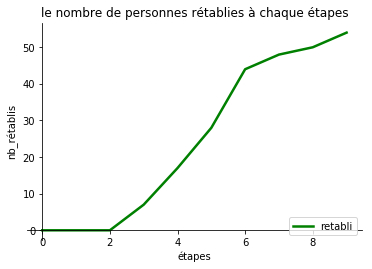

In [107]:
%matplotlib inline

_,_,_,_,_,_,_ ,results,_= simulation_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
    
print("#####")
print(x)
print(y)

figure()
plot(x,y , color="green",  linewidth=2.5, linestyle="-", label="retabli")
xlabel('étapes')
ylabel('nb_rétablis')
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')
title('le nombre de personnes rétablies à chaque étapes')
show()

[[0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
#####
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 0, 0, 16, 23, 30, 35, 39, 42, 44]


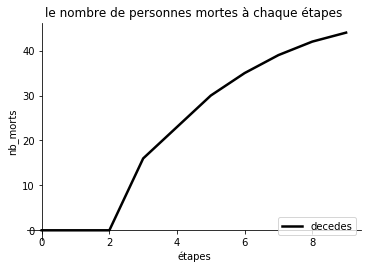

In [108]:
%matplotlib inline

_,_,_,_,_,_,_ ,_,results= simulation_nb()
n = len(results)
x = [i for i in range(n)]
y = [results[i] for i in range(n)]
    
print("#####")
print(x)
print(y)

figure()
plot(x,y , color="black",  linewidth=2.5, linestyle="-", label="decedes")
xlabel('étapes')
ylabel('nb_morts')
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

legend(loc='lower right')
title('le nombre de personnes mortes à chaque étapes')
show()

In [49]:
def simulation(max_itere=10):
    #permet de recuperer l'etat de la matrice apres un certains nombres d'etapes 
    cpt=0
    M = grille(n)
    D= dict()
    D={(1,1):1}
    resultat=[] 
    resultat.append((M).copy())
    new_state=next_step_incubation(M,D)
    while(cpt<max_itere):
        resultat.append((new_state).copy())
        new_state= next_step_incubation(new_state,D)
        cpt = cpt+1
        
    return resultat

In [36]:
res1=simulation(6)
for x in res1:
    print(x)

[[0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 1 0 ..., 0 0 0]
 [0 1 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 1 0 ..., 0 0 0]
 [0 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 1 1 1]
 [0 1 0 ..., 1 0 0]
 [0 1 1 ..., 0 0 0]]
[[1 1 1 ..., 0 0 0]
 [1 3 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 ..., 
 [1 1 1 ..., 1 1 1]
 [0 1 0 ..., 1 0 1]
 [1 1 1 ..., 1 0 0]]
[[1 3 1 ..., 0 0 0]
 [1 3 2 ..., 0 0 0]
 [1 3 1 ..., 0 0 0]
 ..., 
 [1 1 1 ..., 1 1 1]
 [0 1 0 ..., 1 0 1]
 [1 1 1 ..., 1 1 1]]
[[1 3 1 ..., 0 0 0]
 [1 3 2 ..., 0 0 0]
 [2 3 2 ..., 0 0 0]
 ..., 
 [3 2 1 ..., 2 2 3]
 [1 2 0 ..., 3 1 1]
 [1 3 3 ..., 1 1 1]]
[[3 3 3 ..., 0 0 0]
 [2 3 2 ..., 0 0 0]
 [2 3 2 ..., 0 0 0]
 ..., 
 [3 2 3 ..., 2 2 3]
 [1 2 1 ..., 3 1 3]
 [3 3 3 ..., 2 1 1]]


In [53]:
p1 = 0.5
n = 50
p2 = 0.5
M = grille(n)
pas = 4
d = {(1,1):1}

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), array([[1, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), array([[1, 1, 0, ..., 0, 0, 0],
       [0, 2, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), array([[1, 3, 0, ..., 0, 0, 0],
       [0, 2, 2, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]

<IPython.core.display.Javascript object>


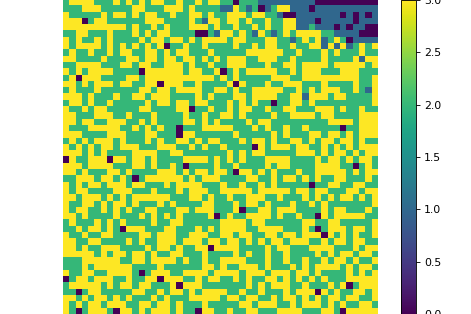

In [55]:
%matplotlib notebook
from pylab import *
import numpy as np
import random


x=0
y=0


def simulation(max_itere=30):
    cpt=0  
    M=grille(n)
    D=dict()
    D={(1,1):1}
    resultat=[]
    resultat.append((M).copy())
    new_state=next_step_incubation(M,D)
    
    while (cpt < max_itere):
        resultat.append(new_state.copy())
        new_state= next_step_incubation(new_state,D)
        cpt = cpt+1
    
    return resultat

resultat_final = simulation(max_itere=30)

print(resultat_final)


import matplotlib.pyplot as plt
size = np.array(M.shape)
dpi = 10.0 
figsize= size[1]/float(dpi),size[0]/float(dpi)
#fig = plt.figure(figsize = figsize, dpi = dpi, facecolor = "white")
fig = plt.figure(facecolor = "white")
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon = False)
im=plt.imshow(M, interpolation = 'nearest', cmap ="viridis", vmin=0, vmax=3)
plt.xticks([]), plt.yticks([])
plt.colorbar()


import matplotlib.animation as animation

def update(i):
    #simulation_4param(max_itere=10)
    M = resultat_final[i]
    im.set_array(M)
    return im,

ani = animation.FuncAnimation(fig, update, frames=len(resultat_final), interval=500)
ani.save('animation_sans_deplacement.html', writer="html")
plt.show()